# Part I: Testing out the Crazyflie (15 Pts)

We will first assemble and configure the Crazyflie and run a simple test script to make sure everything is functioning before doing the lab.

**If you received an unbuilt drone kit**: First, assemble your Crazyflie. Instructions are located [here](https://www.bitcraze.io/documentation/tutorials/getting-started-with-crazyflie-2-x/). **There is one caveat you should be aware of, however.** Instead of using the short connector pins, you need to use the longer set. This is because we are using the FlowDeck expansion deck, which will provide us with significantly more accurate state measurements. There are instructions for mounting expansion decks on the Crazyflie [here](https://www.bitcraze.io/documentation/tutorials/getting-started-with-expansion-decks/). We suggest you push the pins down until they appear on the other side of the flow deck to ensure a secure connection (the pins can be slid further through the black plastic on the connector but it may take some physical effort). Next, we need to install a few things so that you can set the radio channel your crazyflie uses. 

**If you received a pre-built drone**: Please carefully read the instructions for building the drone [here](https://www.bitcraze.io/documentation/tutorials/getting-started-with-crazyflie-2-x/). Even though you have a pre-built drone, the instructions contain a lot of useful information about working with the drone (e.g., the correct configuration of propellers, how to attach the battery, how to switch the drone on/off, the meaning of different LED patterns, etc.).   

Ensure that you have activated the mae345 conda environment. Then, follow the instructions for your operating system below. Note: Using a Mac (without the M1 chips) is probably the easiest option of the options. For this lab, prioritize setting up at least one person in your group with the software for running the Crazyflie. If you are able to get multiple laptops setup, that's great (but not critical at this stage in the course!). 

**Linux**

`pip install cflib libusb cfclient`

Linux only: Update the UDEV rules to recognize the Crazyflie Radio by following the instructions at the end of this [page](https://github.com/bitcraze/crazyflie-lib-python/blob/master/docs/installation/install.md). After completing them, you may need to reboot your computer.

**Windows**

Follow all installation instructions [here](https://github.com/bitcraze/crazyradio-firmware/blob/master/docs/building/usbwindows.md). You should repeat the driver installation twice: first with the Crazyflie connected by USB, then again with the radio receiver connected.

`pip install cflib libusb cfclient`

**Mac (without the Apple M1 chip)**

These instructions are for Macs with Intel chips (i.e., before Apple moved to the M1 chip). See below for instructions for newer Macs with the M1 chip. If you are unsure what kind of chip your Mac has, click on the Apple logo on the top left of your desktop, click on "About this Mac" and see what kind of chip is listed (Intel or M1). 

Now, make sure you have the `brew` package manager installed. You can check if it is already installed by running `brew help` in your terminal. If you see some output, then continue to the next step. If brew is not installed, install it using the terminal command [here](https://brew.sh/).  

Next, in your terminal, run:

`brew install libusb`

Then, run the following (make sure that you are running this from the mae345 conda environment):

`pip install cflib libusb cfclient`

**Mac (with the Apple M1 chip)**

These instructions are for newer Macs that use the Apple M1 chip. We will first need to install a version of the `brew` package manager that is capable of installing software designed for Intel chips. 

In your terminal, run the following commands:

`cd ~/Downloads
mkdir homebrew
curl -L https://github.com/Homebrew/brew/tarball/master | tar xz --strip 1 -C homebrew`

This creates a directory called `homebrew` in your Downloads folder and downloads homebrew. Now run the following:

`sudo mv homebrew /usr/local/homebrew`

Open up the ~/.zshrc file by running:

`open ~/.zshrc`

Then add the following to the end of that file:

`export PATH=$HOME/bin:/usr/local/bin:$PATH
export PATH=$HOME/bin:/usr/local/bin:$PATH
alias axbrew='arch -x86_64 /usr/local/homebrew/bin/brew'
`

Save the file, close it, and then restart the terminal (you will have to activate the mae345 conda environment again). Now we can use the command `axbrew` to install software designed for Intel chips. 

Run the following:

`axbrew install libusb`

Finally, run the following (make sure you're running this from the conda environment):

`pip install cfclient`


**After installing these packages:** Run `cfclient` in terminal (Mac) or Anaconda Prompt (Windows). For Linux, run the command `python -m cfclient.gui` in terminal and make sure your drone is on. If you receive an error regarding `pysdl2`, install the required packages as described [here](https://github.com/bitcraze/crazyflie-clients-python/issues/592) based on your operating system (`pip install pysdl2 pysdl2-dll`). 

The `cfclient` software is a GUI for interacting with the Crazyflie. Connect the Crazyflie to your computer by USB and turn it on. Then, hit `Scan` in the upper left of the window and from the drop down menu pick `usb://0` and hit `Connect`. This uses the USB interface to connect to the drone. In the console tab (hit `View -> Tabs -> Console` if it isn't present), you should see `Crazyflie 2.1 is up and running!` followed by other information. 

The last thing we have to do is set the radio channel the Crazyflie will operate on and will prevent other groups from sending commands to your drone (or your commands to their drone). Hit `Connect -> Configure 2.X`. Set the radio channel option in the dialog box that appears to **Ch.\<your group number\>**. Also make sure that the radio bandwith is 2 MBit/s (if it's set to something else, change it to 2 MBit/s). Hit `Write` (if you don't, this won't be saved). Now, change the value of the variable in the cell below to your group number.

In [56]:
group_number = 4

Next, disconnect the Crazyflie from the USB and plug in the CrazyRadio, hit the `Disconnect` button and `Scan` again. You should see an address that looks something like `radio://0/<group_number>/2M`. You don't need to connect to it again, and, in fact, you can't command the drone via Python while it's connected to the GUI. However, you should confirm the address exists.

To check that everything is working properly, run the following cell. It will print a bunch of logging information (specifically the roll, pitch, and yaw of the drone).

Some tips for working with the Crazyflie:
- The connection with the drone is not always the most stable. Sometimes, a glitch occurs and you may need to restart the drone and / or Jupyter. To restart Jupyter, open the terminal where you ran `jupyter notebook` and hit `Ctrl + C` followed by `y` and `ENTER`.
- Sometimes the drone gets a poor initialization before flying. If it crashes before stabilizing at the hover point, it is unlikely your code is wrong. You may need to just run it again. It helps to plug in the battery/powering the drone on when it is flat on a surface.
- **Turn the quadrotor on when it is plugged in to charge it!** It will not charge when it is powered off so that the onboard processor can monitor the battery and prevent it from overcharging.
- See [this page](https://github.com/Princeton-Introduction-to-Robotics/F2022/blob/main/crazyflie-tips.md) for a compilation of useful tips. 

In [57]:
# This is an example from the Crazyflie Python API.
# See https://github.com/bitcraze/crazyflie-lib-python/blob/master/examples/basiclogSync.py

import logging
import time

import cflib.crtp
from cflib.crazyflie import Crazyflie
from cflib.crazyflie.log import LogConfig
from cflib.crazyflie.syncCrazyflie import SyncCrazyflie
from cflib.crazyflie.syncLogger import SyncLogger

# Only output errors from the logging framework
logging.basicConfig(level=logging.ERROR)


# Initialize the low-level drivers (don't list the debug drivers)
cflib.crtp.init_drivers(enable_debug_driver=False)
# Scan for Crazyflies and use the first one found
print('Scanning interfaces for Crazyflies...')
available = cflib.crtp.scan_interfaces()
print('Crazyflies found:')
for i in available:
    print(i[0])

if len(available) == 0:
    print('No Crazyflies found, cannot run example')
else:
    lg_stab = LogConfig(name='Stabilizer', period_in_ms=10)
    lg_stab.add_variable('stabilizer.roll', 'float')
    lg_stab.add_variable('stabilizer.pitch', 'float')
    lg_stab.add_variable('stabilizer.yaw', 'float')

    cf = Crazyflie(rw_cache='./cache')
    with SyncCrazyflie(available[0][0], cf=cf) as scf:
        with SyncLogger(scf, lg_stab) as logger:
            endTime = time.time() + 10

            for log_entry in logger:
                timestamp = log_entry[0]
                data = log_entry[1]
                logconf_name = log_entry[2]

                print('[%d][%s]: %s' % (timestamp, logconf_name, data))

                if time.time() > endTime:
                    break


Scanning interfaces for Crazyflies...
Crazyflies found:
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
radio://0/4/2M
[165711][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5858323574066162, 'stabilizer.pitch': 1.702453851699829, 'stabilizer.yaw': 0.08967532962560654}
[165721][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.585512101650238, 'stabilizer.pitch': 1.7015610933303833, 'stabilizer.yaw': 0.0886697769165039}
[165731][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5866942405700684, 'stabilizer.pitch': 1.7070794105529785, 'stabilizer.yaw': 0.0892619788646698}
[165741][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5853970646858215, 'stabilizer.pitch': 1.7067188024520874, 'stabilizer.yaw': 0.0896877720952034}
[165751][<cflib.crazy

[166341][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5771334767341614, 'stabilizer.pitch': 1.6676465272903442, 'stabilizer.yaw': 0.08330575376749039}
[166351][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5770471096038818, 'stabilizer.pitch': 1.6729457378387451, 'stabilizer.yaw': 0.08495765179395676}
[166361][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5769577026367188, 'stabilizer.pitch': 1.6791694164276123, 'stabilizer.yaw': 0.08564721047878265}
[166371][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5737189054489136, 'stabilizer.pitch': 1.6750657558441162, 'stabilizer.yaw': 0.08601003140211105}
[166381][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5736100077629089, 'stabilizer.pitch': 1.6812710762023926, 'stabilizer.yaw': 0.08510813117027283}
[166391][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>

[166961][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5583566427230835, 'stabilizer.pitch': 1.6653375625610352, 'stabilizer.yaw': 0.08387793600559235}
[166971][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5581640601158142, 'stabilizer.pitch': 1.6630048751831055, 'stabilizer.yaw': 0.08476917445659637}
[166981][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5572691559791565, 'stabilizer.pitch': 1.6579837799072266, 'stabilizer.yaw': 0.08424344658851624}
[166991][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5572336912155151, 'stabilizer.pitch': 1.654675006866455, 'stabilizer.yaw': 0.08490049839019775}
[167001][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5578513741493225, 'stabilizer.pitch': 1.6593037843704224, 'stabilizer.yaw': 0.085005022585392}
[167011][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: 

[167581][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5888312458992004, 'stabilizer.pitch': 1.6847001314163208, 'stabilizer.yaw': 0.08282385021448135}
[167591][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5882888436317444, 'stabilizer.pitch': 1.6811268329620361, 'stabilizer.yaw': 0.08223068714141846}
[167601][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5914227962493896, 'stabilizer.pitch': 1.6857460737228394, 'stabilizer.yaw': 0.08169010281562805}
[167611][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5945095419883728, 'stabilizer.pitch': 1.6909316778182983, 'stabilizer.yaw': 0.08172918856143951}
[167621][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5965737700462341, 'stabilizer.pitch': 1.697638750076294, 'stabilizer.yaw': 0.08191418647766113}
[167631][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]

[168211][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5987148284912109, 'stabilizer.pitch': 1.6903241872787476, 'stabilizer.yaw': 0.08511727303266525}
[168221][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6011868119239807, 'stabilizer.pitch': 1.6959750652313232, 'stabilizer.yaw': 0.08428794145584106}
[168231][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5992578864097595, 'stabilizer.pitch': 1.6950123310089111, 'stabilizer.yaw': 0.08544410020112991}
[168241][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5983741283416748, 'stabilizer.pitch': 1.693468689918518, 'stabilizer.yaw': 0.0859527587890625}
[168251][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5957313776016235, 'stabilizer.pitch': 1.6988383531570435, 'stabilizer.yaw': 0.08599168062210083}
[168261][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]:

[168831][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5897533297538757, 'stabilizer.pitch': 1.6688603162765503, 'stabilizer.yaw': 0.08321014046669006}
[168841][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5931272506713867, 'stabilizer.pitch': 1.6775133609771729, 'stabilizer.yaw': 0.08358939737081528}
[168851][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5908565521240234, 'stabilizer.pitch': 1.6738402843475342, 'stabilizer.yaw': 0.08340095728635788}
[168861][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5897265076637268, 'stabilizer.pitch': 1.6719356775283813, 'stabilizer.yaw': 0.08294391632080078}
[168871][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5888826847076416, 'stabilizer.pitch': 1.6692184209823608, 'stabilizer.yaw': 0.08357540518045425}
[168881][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>

[169461][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5984826683998108, 'stabilizer.pitch': 1.6919400691986084, 'stabilizer.yaw': 0.07509823143482208}
[169471][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5983051061630249, 'stabilizer.pitch': 1.6905497312545776, 'stabilizer.yaw': 0.07343439012765884}
[169481][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5974515080451965, 'stabilizer.pitch': 1.6887315511703491, 'stabilizer.yaw': 0.07269532978534698}
[169491][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5963790416717529, 'stabilizer.pitch': 1.6866384744644165, 'stabilizer.yaw': 0.07222095876932144}
[169501][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5990177989006042, 'stabilizer.pitch': 1.6937483549118042, 'stabilizer.yaw': 0.0720599815249443}
[169511][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]

[170081][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6016683578491211, 'stabilizer.pitch': 1.6978927850723267, 'stabilizer.yaw': 0.06439147889614105}
[170091][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6004859209060669, 'stabilizer.pitch': 1.6959271430969238, 'stabilizer.yaw': 0.06497019529342651}
[170101][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6023056507110596, 'stabilizer.pitch': 1.7011131048202515, 'stabilizer.yaw': 0.06528601795434952}
[170111][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6017774939537048, 'stabilizer.pitch': 1.7057369947433472, 'stabilizer.yaw': 0.06600507348775864}
[170121][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6009221076965332, 'stabilizer.pitch': 1.7038798332214355, 'stabilizer.yaw': 0.0659843161702156}
[170131][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]

[170711][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6008159518241882, 'stabilizer.pitch': 1.7144315242767334, 'stabilizer.yaw': 0.06021182984113693}
[170721][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5997883081436157, 'stabilizer.pitch': 1.7113728523254395, 'stabilizer.yaw': 0.06030938774347305}
[170731][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.59864741563797, 'stabilizer.pitch': 1.7098538875579834, 'stabilizer.yaw': 0.06088000908493996}
[170741][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5978398323059082, 'stabilizer.pitch': 1.707690954208374, 'stabilizer.yaw': 0.05976134538650513}
[170751][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5983091592788696, 'stabilizer.pitch': 1.7042611837387085, 'stabilizer.yaw': 0.06047810614109039}
[170761][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: 

[171331][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5858891606330872, 'stabilizer.pitch': 1.6907562017440796, 'stabilizer.yaw': 0.06075366213917732}
[171341][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5854314565658569, 'stabilizer.pitch': 1.688876986503601, 'stabilizer.yaw': 0.06034548580646515}
[171351][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5873764157295227, 'stabilizer.pitch': 1.6955841779708862, 'stabilizer.yaw': 0.060369476675987244}
[171361][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5865353941917419, 'stabilizer.pitch': 1.6942923069000244, 'stabilizer.yaw': 0.060261767357587814}
[171371][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5855084657669067, 'stabilizer.pitch': 1.6903305053710938, 'stabilizer.yaw': 0.0592668354511261}
[171381][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>

[171961][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5965808629989624, 'stabilizer.pitch': 1.673630952835083, 'stabilizer.yaw': 0.06121876835823059}
[171971][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5983622670173645, 'stabilizer.pitch': 1.67837393283844, 'stabilizer.yaw': 0.060722026973962784}
[171981][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6028626561164856, 'stabilizer.pitch': 1.6822668313980103, 'stabilizer.yaw': 0.061165500432252884}
[171991][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6017760038375854, 'stabilizer.pitch': 1.6792906522750854, 'stabilizer.yaw': 0.060963910073041916}
[172001][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.6049949526786804, 'stabilizer.pitch': 1.6838059425354004, 'stabilizer.yaw': 0.06129620969295502}
[172011][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>

[172581][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5864431858062744, 'stabilizer.pitch': 1.6848019361495972, 'stabilizer.yaw': 0.06346426159143448}
[172591][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5845543146133423, 'stabilizer.pitch': 1.6818938255310059, 'stabilizer.yaw': 0.06379736214876175}
[172601][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5855415463447571, 'stabilizer.pitch': 1.688846468925476, 'stabilizer.yaw': 0.0634758472442627}
[172611][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5851538181304932, 'stabilizer.pitch': 1.687431812286377, 'stabilizer.yaw': 0.06357724219560623}
[172621][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5844365954399109, 'stabilizer.pitch': 1.693852186203003, 'stabilizer.yaw': 0.06277947127819061}
[172631][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {

[173211][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5791381001472473, 'stabilizer.pitch': 1.6837549209594727, 'stabilizer.yaw': 0.04945002868771553}
[173221][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5781034827232361, 'stabilizer.pitch': 1.6820067167282104, 'stabilizer.yaw': 0.049279265105724335}
[173231][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5785609483718872, 'stabilizer.pitch': 1.6820306777954102, 'stabilizer.yaw': 0.04906293377280235}
[173241][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.577721357345581, 'stabilizer.pitch': 1.6810468435287476, 'stabilizer.yaw': 0.04780065640807152}
[173251][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5801470279693604, 'stabilizer.pitch': 1.686196208000183, 'stabilizer.yaw': 0.04656970873475075}
[173261][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]

[173841][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5863486528396606, 'stabilizer.pitch': 1.7127487659454346, 'stabilizer.yaw': 0.03333188220858574}
[173851][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5899255275726318, 'stabilizer.pitch': 1.7179806232452393, 'stabilizer.yaw': 0.033106729388237}
[173861][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5880415439605713, 'stabilizer.pitch': 1.7143617868423462, 'stabilizer.yaw': 0.03423374891281128}
[173871][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5854836702346802, 'stabilizer.pitch': 1.7122390270233154, 'stabilizer.yaw': 0.03397000581026077}
[173881][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5855782628059387, 'stabilizer.pitch': 1.7088656425476074, 'stabilizer.yaw': 0.032874077558517456}
[173891][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]

[174461][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5707980394363403, 'stabilizer.pitch': 1.7184265851974487, 'stabilizer.yaw': 0.026442864909768105}
[174471][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5716965794563293, 'stabilizer.pitch': 1.7167311906814575, 'stabilizer.yaw': 0.02696583978831768}
[174481][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5707049369812012, 'stabilizer.pitch': 1.7151533365249634, 'stabilizer.yaw': 0.02692457288503647}
[174491][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5695813298225403, 'stabilizer.pitch': 1.7130711078643799, 'stabilizer.yaw': 0.0270707868039608}
[174501][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5690220594406128, 'stabilizer.pitch': 1.7133089303970337, 'stabilizer.yaw': 0.027559904381632805}
[174511][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90

[175071][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5481541156768799, 'stabilizer.pitch': 1.6753541231155396, 'stabilizer.yaw': 0.02649100311100483}
[175081][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5487563014030457, 'stabilizer.pitch': 1.6714656352996826, 'stabilizer.yaw': 0.025998199358582497}
[175091][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5464520454406738, 'stabilizer.pitch': 1.6701490879058838, 'stabilizer.yaw': 0.026548760011792183}
[175101][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5450578927993774, 'stabilizer.pitch': 1.6672585010528564, 'stabilizer.yaw': 0.02722890116274357}
[175111][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.545383095741272, 'stabilizer.pitch': 1.6641725301742554, 'stabilizer.yaw': 0.02669244259595871}
[175121][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90

[175701][<cflib.crazyflie.log.LogConfig object at 0x7f3a1fb20a90>]: {'stabilizer.roll': 0.5818842649459839, 'stabilizer.pitch': 1.6666755676269531, 'stabilizer.yaw': 0.02106836996972561}


# Part II: LQR Control of a Quadrotor

In this part, we are going to use a hover state linearization of the quadrotor, like you wrote in the previous lab to allow the quadrotor to hover. First, we are going to import the various classes and functions we need.

In [1]:
from quad_utils import plotting, Crazyflie as CF, animate_quad
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_continuous_are
from IPython.display import HTML, Image

## Problem 1 (20 Pts)

Now, in the cell below, you will fillout the function that will actually solve the LQR problem. That is, given the matrices $\mathbf{A}, \mathbf{B}, \mathbf{Q}, \mathbf{R}$, you should compute the $K$ that minimizes the LQR cost function. You are encouraged to use the function `scipy.linalg.solve_continuous_are` to solve the CARE. Also, we use the convention that the stabilizing control input is given by $\mathbf{u} = \mathbf{K}\mathbf{x}$ (as opposed to $\mathbf{u} = -\mathbf{K}\mathbf{x}$).

In [2]:
def lqr(A: np.ndarray, B: np.ndarray, Q: np.ndarray, R: np.ndarray) -> np.ndarray:
    S = solve_continuous_are(A, B, Q, R)
    K = -np.linalg.inv(R) @ B.T @ S
    return K

## Problem 2 (30 Pts)

Finally, you will use all the code you have written thus far to actually stabilize your Crazyflie. The following code implements a version of the Crazyflie class from our `quad_utils` library that uses the linearization and LQR functions you just wrote. This class is useful as it provides simulation and animation functionality to verify your controller is working. It also saves out $\mathbf{K}$ so it can be loaded onto the actual quadrotor for control. You will need to adjust the gains yourself, but we filled in a few for you to get started.

### LQR Simulation

The code for this problem is broken into two sections: designing the LQR controller and running the Crazyflie. 

The following cell uses the `lqr` function you just wrote in conjunction with our implementation of the linearization function from the previous lab (here as `self.hover_state_linearization()`) to create an instance of the `CrazyflieLQR` class. The details of this process are not important, but this class provides a lot of functionality for designing the LQR controller. It also saves the $\mathbf{K}$ matrix out as `quad_data/lqr_gains.npy`. Run this block to set your gains.

In [3]:
class CrazyflieLQR(CF):
    def __init__(self, Q: np.ndarray, R: np.ndarray, hover_pos: np.ndarray):
        super().__init__()
        self._hover_pos = hover_pos
        self._hover_state = np.concatenate([self._hover_pos, np.zeros(9)])
        A, B =  self.hover_state_linearization()
        self._K = lqr(A, B, Q, R)
        
        print('Using K matrix:')
        print()
        print(self._K)
        
        np.save('quad_data/lqr_gains', self._K)
        
    @property
    def K(self) -> np.ndarray:
        return self._K
    
    def controller(self, state: np.ndarray, t: float) -> np.ndarray:
        return self._K @ (state - self._hover_state) + np.array([self.mass * self.gravity, 0, 0, 0])

# The first argument is the Q matrix, the second is the R matrix. You can disregard the third argument.
quad = CrazyflieLQR(np.diag([1000, 1000, 2000, 0.001, 0.001, 1, 100, 100, 1, 0.005, 0.005, 1]), 2 * np.diag([1e5, 6e9, 6e9, 1e4]), np.zeros(3))

Using K matrix:

[[ 3.43613258e-14  0.00000000e+00 -1.00000000e-01  0.00000000e+00
  -3.27465554e-14  0.00000000e+00  2.64176468e-14  0.00000000e+00
  -7.74919351e-02  0.00000000e+00  6.02430603e-14  0.00000000e+00]
 [ 0.00000000e+00 -2.88675135e-04  0.00000000e+00 -7.67668375e-04
   0.00000000e+00 -4.74175509e-19  0.00000000e+00 -2.31428618e-04
   0.00000000e+00 -1.47624478e-04  0.00000000e+00 -7.21112665e-20]
 [ 2.88675135e-04  0.00000000e+00  6.02268421e-15  0.00000000e+00
  -7.65087770e-04  0.00000000e+00  2.31099920e-04  0.00000000e+00
   2.13794664e-15  0.00000000e+00 -1.46830037e-04  0.00000000e+00]
 [ 0.00000000e+00 -9.50873440e-14  0.00000000e+00 -1.70919770e-13
   0.00000000e+00 -7.07106781e-03  0.00000000e+00 -6.58705247e-14
   0.00000000e+00 -2.06492179e-14  0.00000000e+00 -7.10074653e-03]]


This next cell simulates the quadrotor flying with a random initial condition for five seconds and plots some of the states. You should see the system stabilize for most choices of the random initial conditions, or your gains will almost certainly not work on the real Crazyflie. Feel free to change the plotted variables.

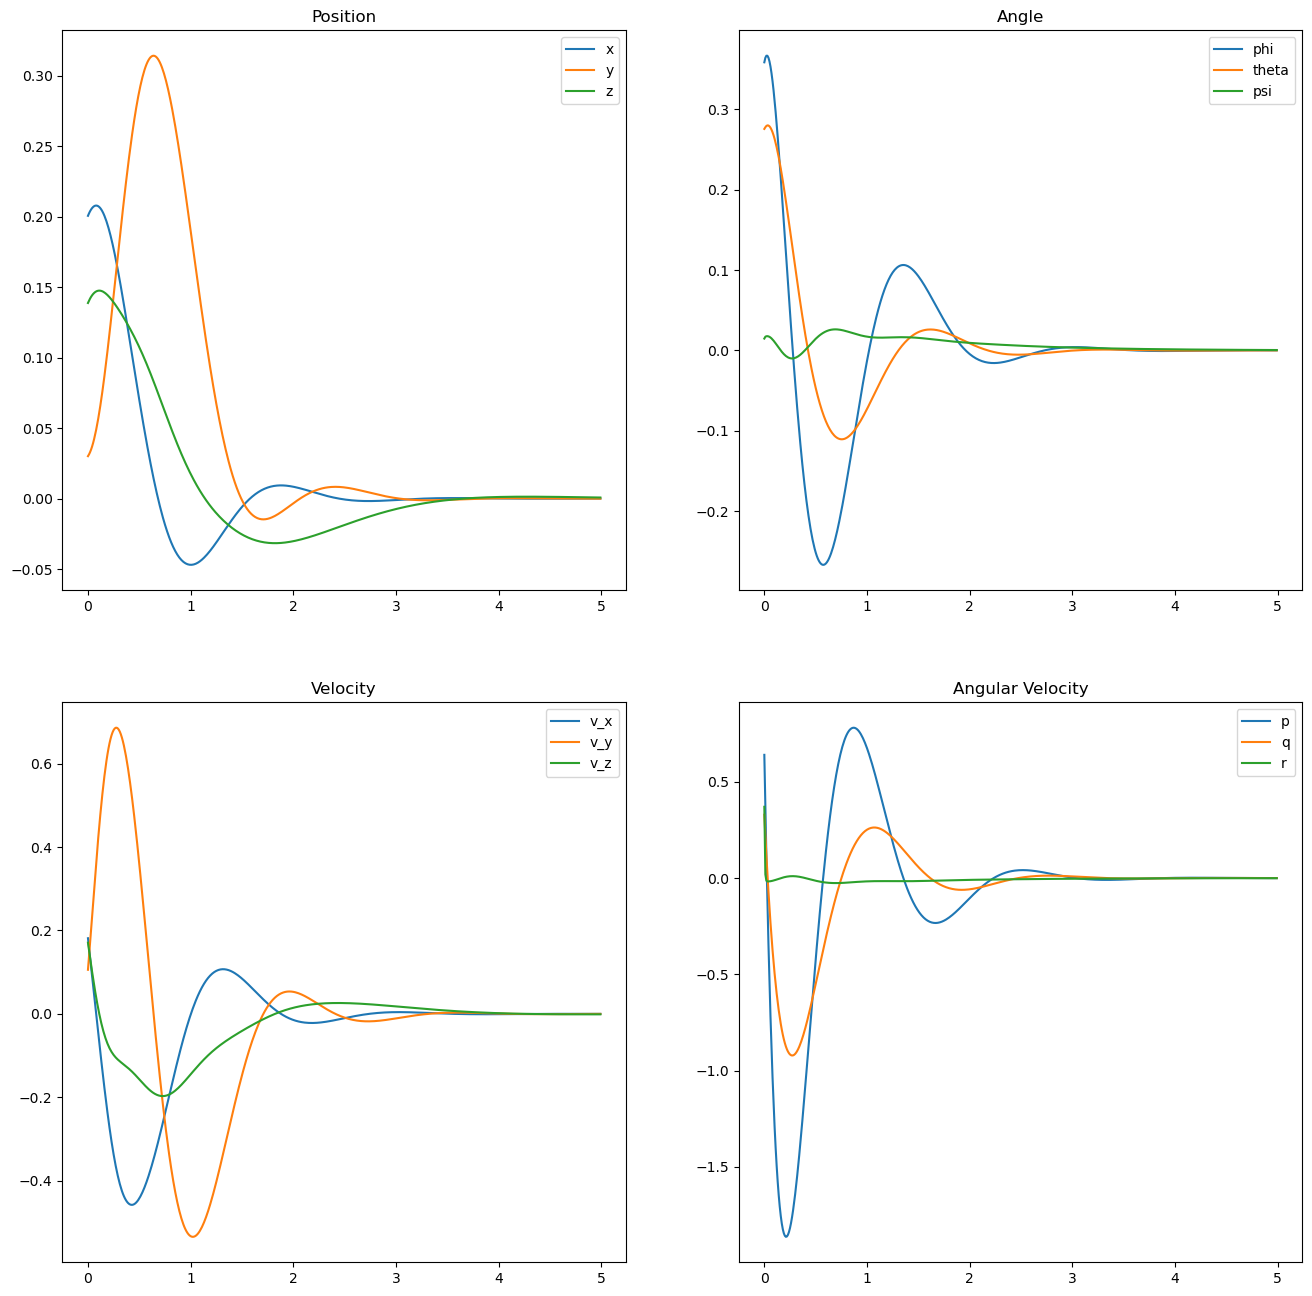

In [7]:
# Uncomment the following line if you want to use the same random initial condition.
# np.random.seed(0)

total_time = 5
dt = 0.01

ic = np.random.rand(12) * 1.2
ic[0:3] = ic[0:3] / 5
ic[6:9] = ic[6:9] / 5

times, states, inputs = quad.simulate(ic, total_time, dt, clip_input=False)

#%matplotlib notebook
plt.rcParams["figure.figsize"] = (16,16)
fig = plt.figure()

ax = fig.add_subplot(221, title='Position')
ax.plot(times, states[0, :], label='x')
ax.plot(times, states[1, :], label='y')
ax.plot(times, states[2, :], label='z')
ax.legend()

ax = fig.add_subplot(222, title='Angle')
ax.plot(times, states[3, :], label='phi')
ax.plot(times, states[4, :], label='theta')
ax.plot(times, states[5, :], label='psi')
ax.legend()

ax = fig.add_subplot(223, title='Velocity')
ax.plot(times, states[6, :], label='v_x')
ax.plot(times, states[7, :], label='v_y')
ax.plot(times, states[8, :], label='v_z')
ax.legend()

ax = fig.add_subplot(224, title='Angular Velocity')
ax.plot(times, states[9, :], label='p')
ax.plot(times, states[10, :], label='q')
ax.plot(times, states[11, :], label='r')
ax.legend()

This cell optionally animates the simulation data computed and plotted in the previous cell.

In [1]:
animate_quad(0.1, states).save('./anim.gif', writer='pillow', fps=100)
Image(url='./anim.gif')

## Running the Quadrotor

### Setup

Now that you have a set of LQR gains you are happy with trying out, it's time to put them on the quadrotor. First, you need to flash the quadrotor with our modified version of the Crazyflie's firmware. Our modifications apply the LQR control law in real time --- i.e. much faster than we could do with Python over the radio.

**You only need to do this successfully once AND if you have a new drone.** If you have a pre-built drone, the drone has the correct firmware on it already. First, power the drone off. Then, hold the power switch down for about 3 seconds until the blue LED flashes, then release. After releasing, two blue LEDs should be flashing.  Then, open up your terminal and enter the following commands:

```
cd firmware-precompiled
python3 -m cfloader flash cf2.bin stm32-fw
```

(**Note**: You should make sure that there are no other drones powered on in the vicinity of your drone. Otherwise the firmware update is likely to fail due to interference from other drones.)

Once this is completed, your Crazyflie should restart and play a jingle. If all the lights are on, not flashing, and no jingle plays, repeat the flashing process.

### Flying

To test out the quadrotor, simply run the cells below after placing it in the netted area. The drone will take off and land using the Crazyflie's own PID controller, but your LQR controller will stabilize the drone once it is hover a half meter off the ground. The drone beeps when switching controllers.

If you seen an error about something missing in the Log TOC (e.g. `stabilizer.controller not in param TOC`), this most likely means your computer lost connection with the drone midflight. (**Warning**: When you are testing your LQR controller, it can cause intereference with other drones' LQR controller. The LQR only runs for 5 seconds, so we recommend staggering the use of the following cell with other groups that are in same drone testing area to avoid interference issues.)

### Submission

You must submit the following to confirm that you got the drone to hover successfully:
- A video of your drone hovering
- The file `quad_data/quad_traj.npz`
- This notebook file

Please submit a zip file containing these to Gradescope, **HW2: Coding**.

You will be graded according to the data in `quad_data/quad_traj.npz`, which is plotted below. The rubric is the following:
- If tracking error in x and y each below 75 cm: 10 points
- If tracking error in x and y each below 50 cm: 20 points
- If tracking error in x and y each below 25 cm: 30 points

When you are ready to test on the Crazyflie, set your gains in the next cell, then run the following cell.

In [96]:
# SET GAINS HERE
Q = np.diag([1660,   # x
             1600,   # y
             2000,   # z
             0.07,   # phi
             0.15,   # theta
             1,      # psi
             800,    # vx
             800,    # vy
             1,      # vz
             0.007,  # p
             0.02,   # q
             1       # r
            ])
R = np.diag([8e4, 8e8, 2e9, 2e4])
quad = CrazyflieLQR(Q, R, np.zeros(3)) # TO START, COPY AND PASTE YOUR COST MATRICES Q AND R FROM ABOVE

In [97]:
import logging
import random
import time
import numpy as np

import cflib.crtp
from cflib.crazyflie import Crazyflie
from cflib.crazyflie.syncCrazyflie import SyncCrazyflie
from cflib.crazyflie.log import LogConfig
from cflib.crazyflie.syncLogger import SyncLogger

URI = f'radio://0/{group_number}/2M'

# Only output errors from the logging framework
logging.basicConfig(level=logging.ERROR)

log_keys = ['e_x',
            'e_y',
            'e_roll',
            'e_pitch',
            'u2_pwm',
            'u3_pwm',]

other_log_keys = []

if __name__ == '__main__':
    cflib.crtp.init_drivers(enable_debug_driver=False)

    with SyncCrazyflie(URI, cf=Crazyflie(rw_cache='./cache')) as scf:
        cf = scf.cf

        lg_stab = LogConfig(name='LQR', period_in_ms=10)
        lg_data = {}

        for key in log_keys:
            lg_stab.add_variable('ctrlLQR.' + key, 'float')
            lg_data[key] = []

        for key in other_log_keys:
            lg_stab.add_variable( key, 'float')
            lg_data[key.split('.')[1]] = []

        for i in range(4):
            for j in range(12):
                cf.param.set_value(f'ctrlLQR.k{i + 1}{j + 1}', '{:.10f}'.format(quad.K[i, j]))

        print('Loaded LQR gain matrix.')
        print('Initializing as PID')
        cf.param.set_value('stabilizer.controller', '1')

        cf.param.set_value('kalman.resetEstimation', '1')
        time.sleep(0.1)
        cf.param.set_value('kalman.resetEstimation', '0')
        time.sleep(2)

        print('Reset Kalman filter.')
        print('Taking off!')

        for y in range(10):
            cf.commander.send_hover_setpoint(0, 0, 0, y / 25)
            #cf.commander.send_stop_setpoint()
            time.sleep(0.1)

        for _ in range(50):
            cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
            #cf.commander.send_stop_setpoint()
            time.sleep(0.1)

        print('Switching to LQR!')
        cf.param.set_value('stabilizer.controller', '3')

        with SyncLogger(scf, lg_stab) as logger:
            t_start = time.time()
            entry_count = 0

            for log_entry in logger:
                cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
                for key, value in log_entry[1].items():
                    lg_data[key.split('.')[1]].append(value)

                entry_count += 1

                if time.time() - t_start > 5:
                    break

        print('Saving data...')
        for key in lg_data.keys():
            lg_data[key] = np.array(lg_data[key])

        np.savez('quad_data/quad_traj', **lg_data)

        print('Switching to PID!')
        cf.param.set_value('stabilizer.controller', '1')

        for _ in range(60):
            cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
            time.sleep(0.1)

        for y in range(10):
            cf.commander.send_hover_setpoint(0, 0, 0, (10 - y) / 25)
            time.sleep(0.1)

        for i in range(10):
            cf.commander.send_stop_setpoint()
            time.sleep(0.1)

print('Done!') 

Loaded LQR gain matrix.
Initializing as PID
Reset Kalman filter.
Taking off!
Switching to LQR!
Saving data...
Switching to PID!
Done!


Finally, this cell plots the result of your physical experiments, i.e. the data logged by the most recent run of `run_lab1.py` in `quad_data/quad_traj.npz`. If you run it before flying the quadrotor, it will error since there is currently no flight data present. The output of the next cell _must_ be included in the notebook when you submit.

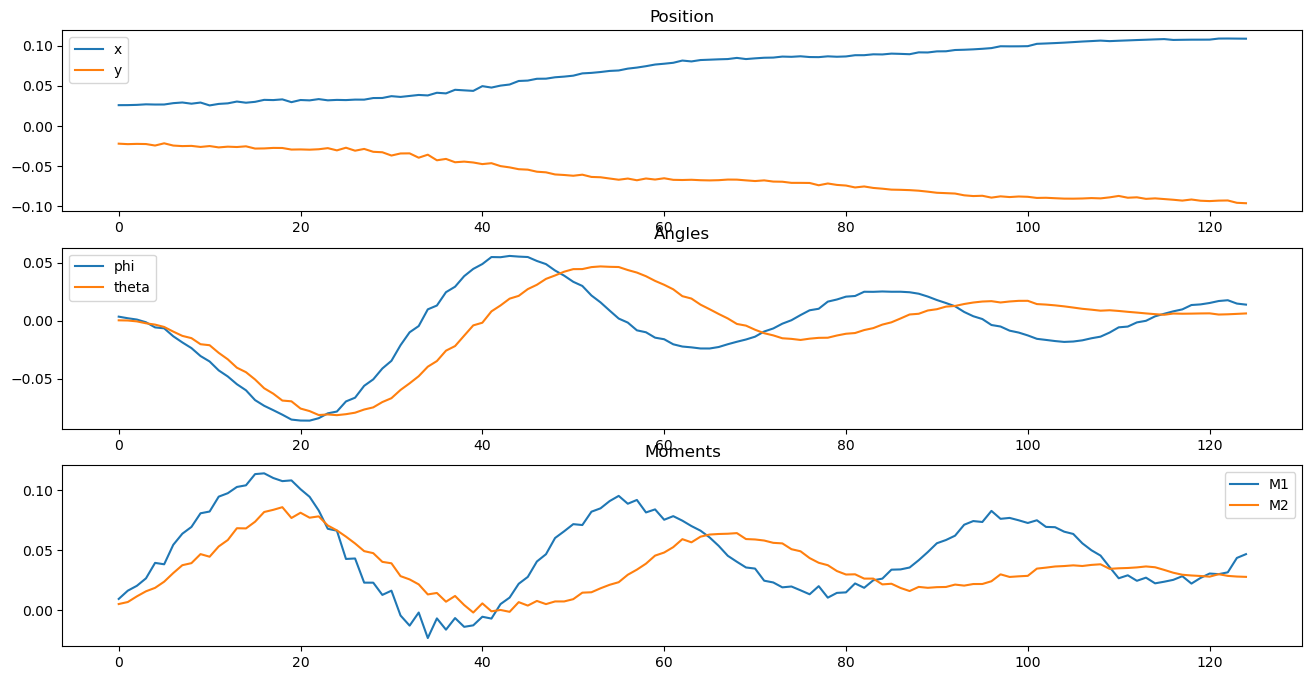

In [3]:
import os

if os.path.isfile('quad_data/quad_traj.npz'):
    npzfile = np.load('quad_data/quad_traj.npz')

    plt.rcParams["figure.figsize"] = (16,8)
    fig = plt.figure()

    ax = fig.add_subplot(311, title='Position')
    ax.plot(npzfile['e_x'][:125], label='x')
    ax.plot(npzfile['e_y'][:125], label='y')
    ax.legend()

    ax = fig.add_subplot(312, title='Angles')
    ax.plot(npzfile['e_roll'][:125], label='phi')
    ax.plot(npzfile['e_pitch'][:125], label='theta')
    ax.legend()

    ax = fig.add_subplot(313, title='Moments')
    ax.plot(npzfile['u2_pwm'][:125] / (2 ** 15), label='M1')
    ax.plot(npzfile['u3_pwm'][:125] / (2 ** 15), label='M2')
    ax.legend()
else:
    print('No flight data found.')